In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [2]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact

## Problema del caricamento

Quando un sistema è rappresentato da uno schema a blocchi, l'idea principale è che un segnale in ingresso influenza solamente il segnale in uscita. L'output di un blocco può quindi essere utilizzato come ingresso per un blocco successivo. La supposizione implicita, tuttavia, è che quando viene connesso un nuovo blocco, nulla cambia nel blocco precedente. Questo però in generale non è vero. Questo fatto è solitamente indicato come il »problema del caricamento«. Ad esempio, analizziamo i due sistemi mostrati di seguito.

<table>
    <tr>
        <th style="text-align:center"> Rappresentazione schematica del problema del caricamento</th>
    </tr>
    <tr>
        <td style><img src='img/loading_problem.png'></td>
    </tr>
    <tr>
    </tr>
</table>

Dal punto di vista della teoria del controllo, ciascuno di essi può essere analizzato separatamente e possono essere ottenute le funzioni di trasferimento $P_1(s)$ e $P_2(s)$. Se i blocchi sono poi collegati in serie, si potrebbe pensare che la funzione di trasferimento del sistema combinato $P(s)$ sia uguale a $P_1(s) \cdot P_2(s)$, dato che l'output del primo sistema è l'input per il secondo sistema. La risposta al gradino per questa funzione di trasferimento è mostrata in arancione nel grafico sottostante (risposta "teoria del controllo").

Se invece si analizza il sistema dal punto di vista elettrico, si ottiene una diversa funzione di trasferimento. La risposta al gradino associata è mostrata in verde nel grafico sottostante (risposta "ingegneria elettrica"). La differenza tra i due è dovuta al problema del caricamento.
Se l'impedenza di ingresso del secondo sistema è molto maggiore dell'impedenza di uscita del primo, la differenza è trascurabile ai fini pratici.

---

### Come usare questo notebook?
Sposta i cursori per modificare i valori di $R_1$, $R_2$, $L_1$ e $L_2$ e osserva la risposta "teoria del controllo" e "ingegneria elettrica" insieme alle corrispondenti funzioni di trasferimento.

<IPython.core.display.Javascript object>


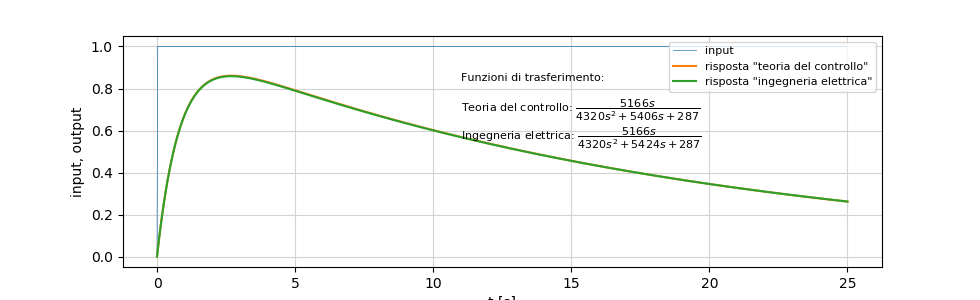

interactive(children=(IntSlider(value=10, description='$R_1$', max=300, min=1), IntSlider(value=10, descriptio…

In [4]:
num_of_samples = 100
total_time = 25
t = np.linspace(0, total_time, num_of_samples*10)# time for which response is calculated (start, stop, step)

# making step function (for plotting)
step_function = np.ones(len(t))
step_function[0]=0

# make figure
fig = plt.figure(figsize=(9.8, 3),num='Problema del caricamento')

# add axes
ax = fig.add_subplot(111)
ax.set_xlabel('t [s]')
ax.set_ylabel('input, output')

ax.grid(which='both', axis='both', color='lightgray')


# plot step function and responses (initalisation)
ax.plot(t, step_function, lw=.5, label='input')

resp1, = ax.plot([], [], lw=1.5, label='risposta "teoria del controllo"')
resp2, = ax.plot([], [], lw=1.5, label='risposta "ingegneria elettrica"')
ax.legend(loc=1, fontsize=8)

R1=1
L1=1
R2=1
L2=1

eq = ax.text((-ax.get_xlim()[0]+ax.get_xlim()[1])*.4, (-ax.get_ylim()[0]+ax.get_ylim()[1])*.5, '',fontsize=8)
# eq.set_bbox(dict(facecolor='b', alpha=0.07, edgecolor='red'))

plt.show()

def set_input(R1=10, R2=20, L1=20, L2=4):
    # make transfer functions (with scipy)
    control_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L2, R1*R2])
    electro_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L1+R1*L2, R1*R2])
    # calculate step response (with scipy)
    time1, response1 = signal.step(control_transfer, T=t)
    time2, response2 = signal.step(electro_transfer, T=t)

    # update responses plots
    resp1.set_data(time1, response1)
    resp2.set_data(time2, response2)
    
    plt.show()
    
    #update strings for equations
    niz_gor_con = str(R2*L1) + 's'
    niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
    niz_gor_ele = str(R2*L1) + 's'
    niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)
    #update equations
    tekst = 'Funzioni di trasferimento:\n\nTeoria del controllo: $\dfrac{' + niz_gor_con + '}{' + niz_dol_con + '}$\nIngegneria elettrica: $\dfrac{' + niz_gor_ele + '}{' + niz_dol_ele + '}$'
    eq.set_text(tekst)

# make string to show equations
niz_gor_con = str(R2*L1) + 's'
niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
niz_gor_ele = str(R2*L1) + 's'
niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)

interact(set_input, R1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_1$'),
         R2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_2$'),
         L1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_1$'),
         L2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_2$'));
